### Importing libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('data/stud.csv')

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Exploring data

In [12]:
print("catagories in the Gender:",end=" ")
print(df['gender'].unique())

print("catagories in the race_ethnicity:",end=" ")
print(df['race_ethnicity'].unique())

print("catagories in the parental_level_of_education:",end=" ")
print(df['parental_level_of_education'].unique())

print("catagories in the lunch:",end=" ")
print(df['lunch'].unique())

print("catagories in the test_preparation_course:",end=" ")
print(df['test_preparation_course'].unique())


catagories in the Gender: ['female' 'male']
catagories in the race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
catagories in the parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
catagories in the lunch: ['standard' 'free/reduced']
catagories in the test_preparation_course: ['none' 'completed']


In [13]:
#Defining numerical features
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
catagorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

#Print columns
print('we have {} numerical features: {}'.format(len(numerical_features),numerical_features))
print('We have {} categorical features: {}'.format(len(catagorical_features),catagorical_features))

we have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### Add columns of Total Score and Average Score

In [14]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average_score']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full=df['reading_score'].eq(100).sum()
writing_full = df['writing_score'].eq(100).sum()
math_full=df['math_score'].eq(100).sum()

print('Number of students with full marks in Math:',math_full)
print('Number of students with full matks in writing:',writing_full)
print('Number of students with full matks in reading:',reading_full)

Number of students with full marks in Math: 7
Number of students with full matks in writing: 14
Number of students with full matks in reading: 17


In [16]:
reading_less_20=df['reading_score'].le(20).sum()
writing_less_20=df['writing_score'].le(20).sum()
math_less_20=df['math_score'].le(20).sum()

print('Number of students with less than 20 marks in Math:',math_less_20)
print('Number of students with less than 20 marks in writing:',writing_less_20)
print('Number of students with less than 20 marks in reading:',reading_less_20)

Number of students with less than 20 marks in Math: 4
Number of students with less than 20 marks in writing: 3
Number of students with less than 20 marks in reading: 1


### Visualization

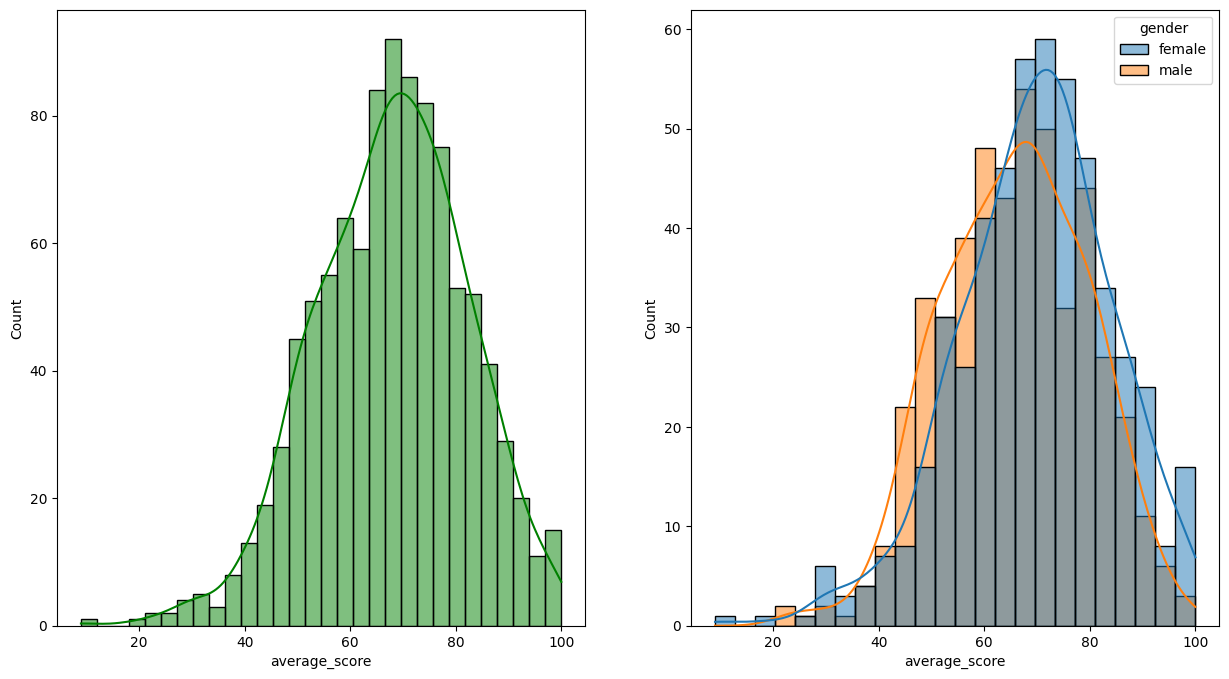

In [17]:
fig,axs=plt.subplots(1,2,figsize=(15,8))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

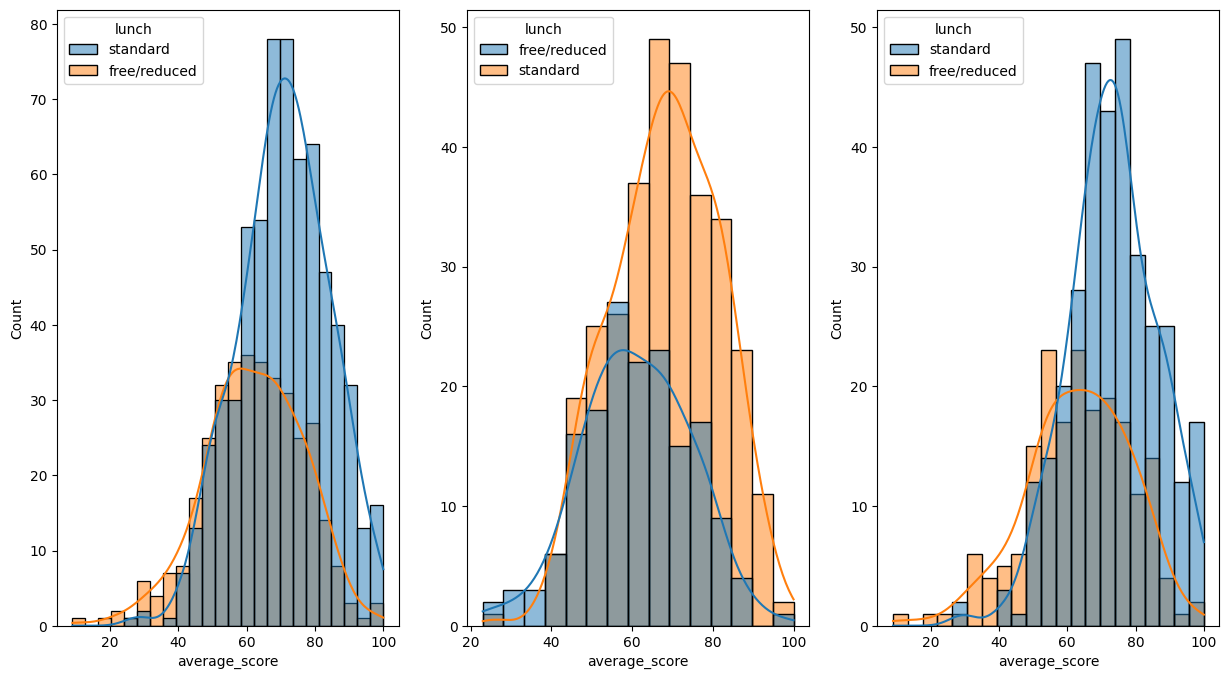

In [18]:
fig,axs=plt.subplots(1,3,figsize=(15,8))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'],x='average_score',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'],x='average_score',kde=True,hue='lunch')
plt.show()

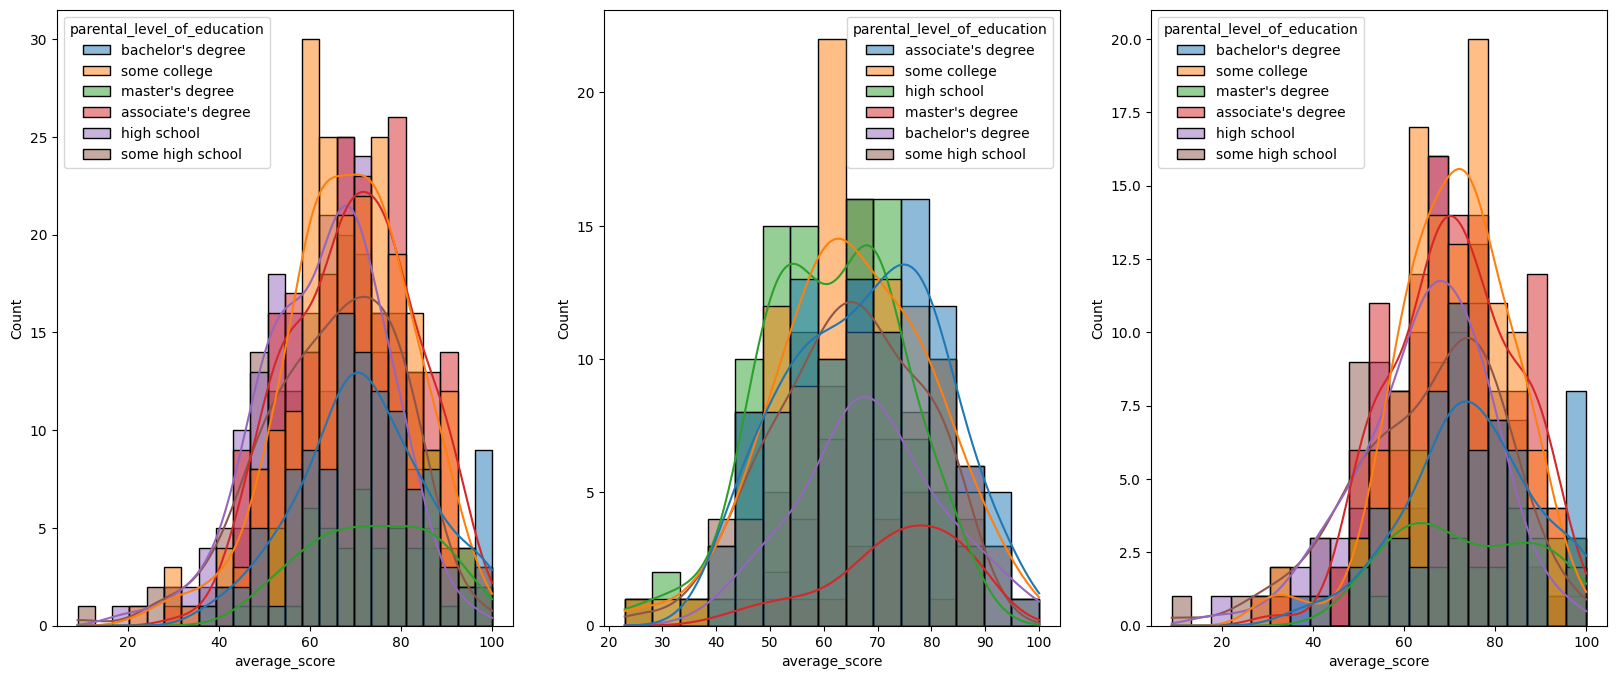

In [19]:

fig,axs=plt.subplots(1,3,figsize=(20,8))
sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education',ax=axs[0])
sns.histplot(data=df[df['gender']=='male'],x='average_score',kde=True,hue='parental_level_of_education',ax=axs[1])
sns.histplot(data=df[df['gender']=='female'],x='average_score',kde=True,hue='parental_level_of_education',ax=axs[2])
plt.show()

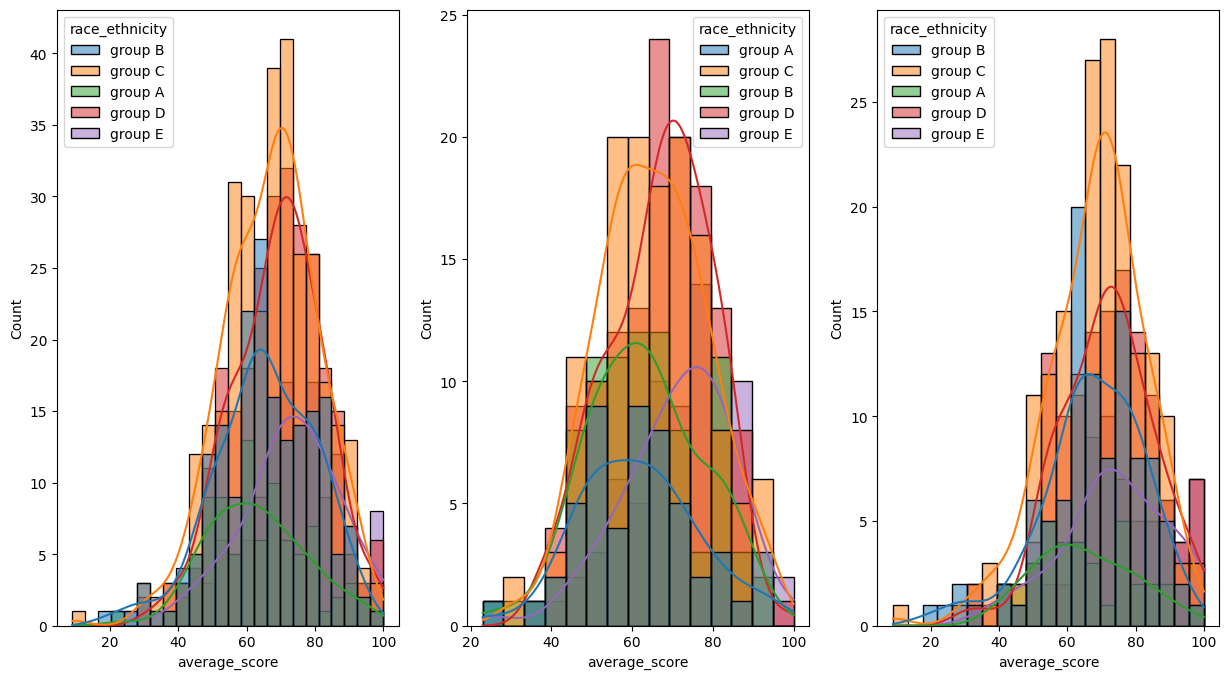

In [20]:
fig,axs=plt.subplots(1,3,figsize=(15,8))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

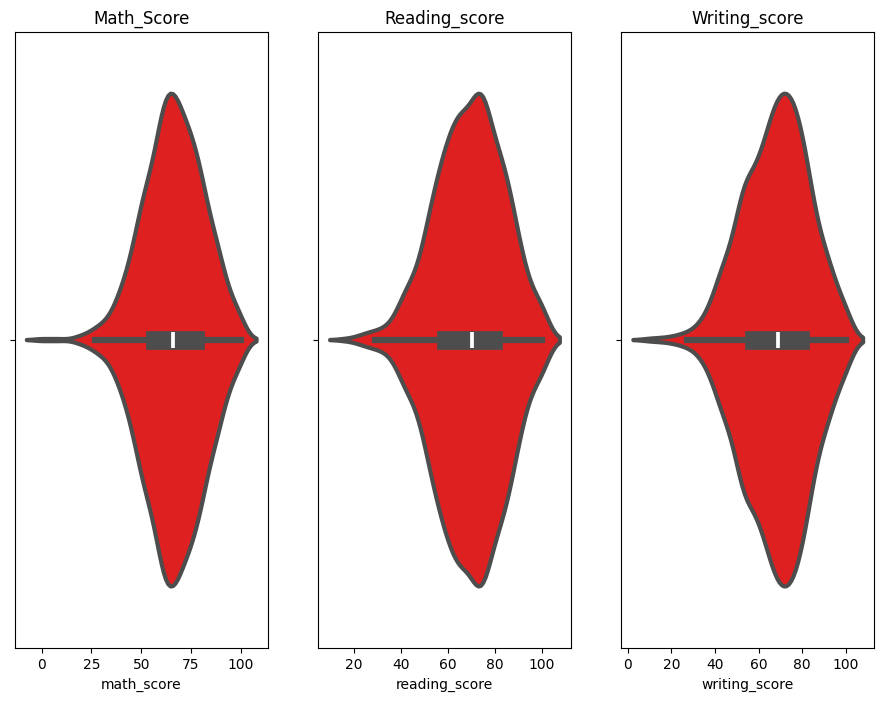

In [21]:
plt.figure(figsize=(15,8))
plt.subplot(1,4,1)
plt.title('Math_Score')
sns.violinplot(x='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading_score')
sns.violinplot(x='reading_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing_score')
sns.violinplot(x='writing_score',data=df,color='red',linewidth=3)
plt.show()

#### 4.3 Multivariate analysis using pieplot

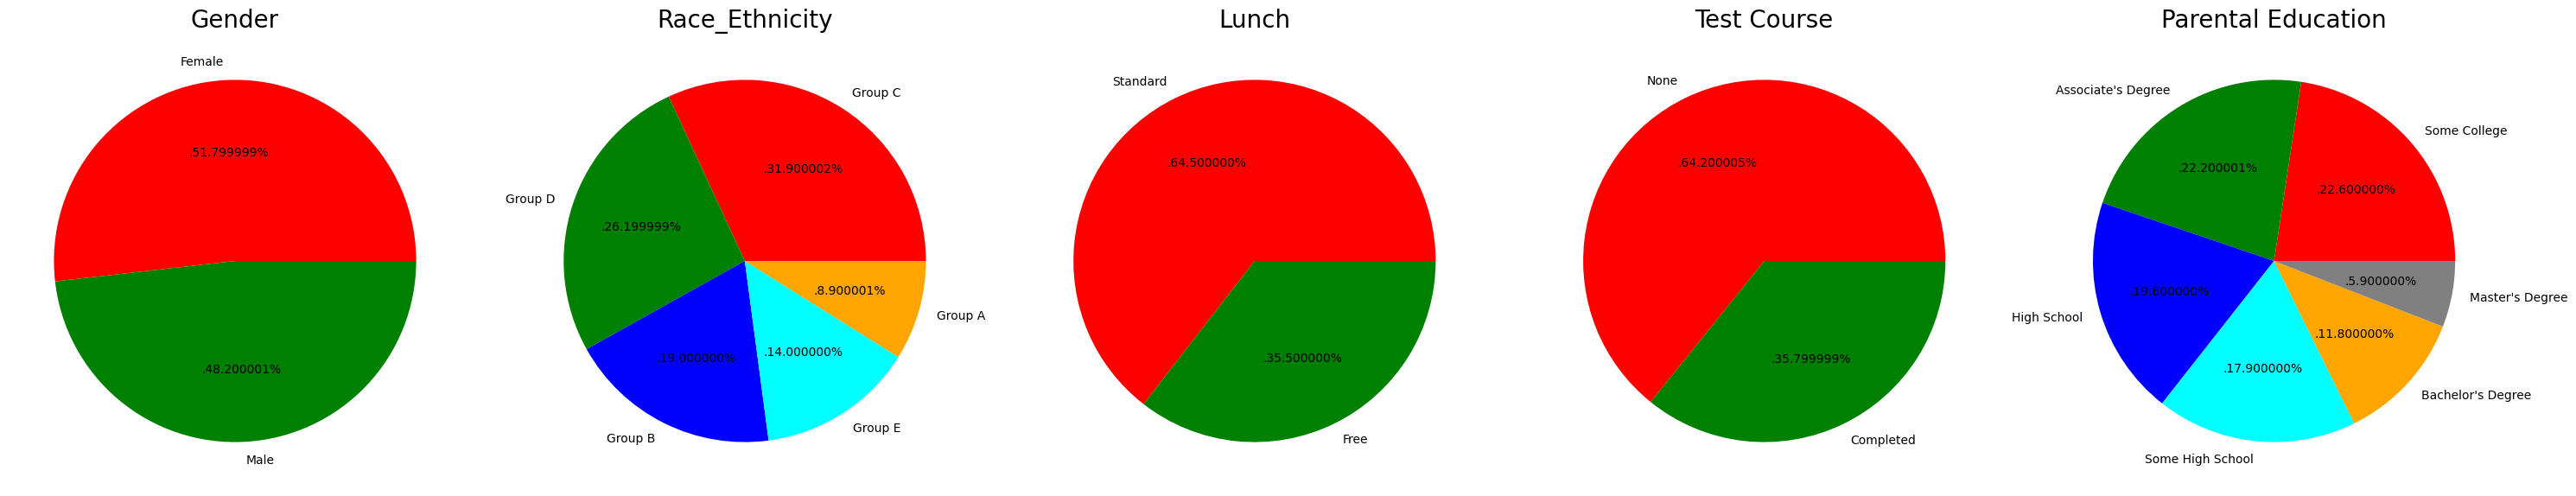

In [22]:
plt.rcParams['figure.figsize'] = (30, 9)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('on')


plt.tight_layout()
plt.grid()

plt.show()

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

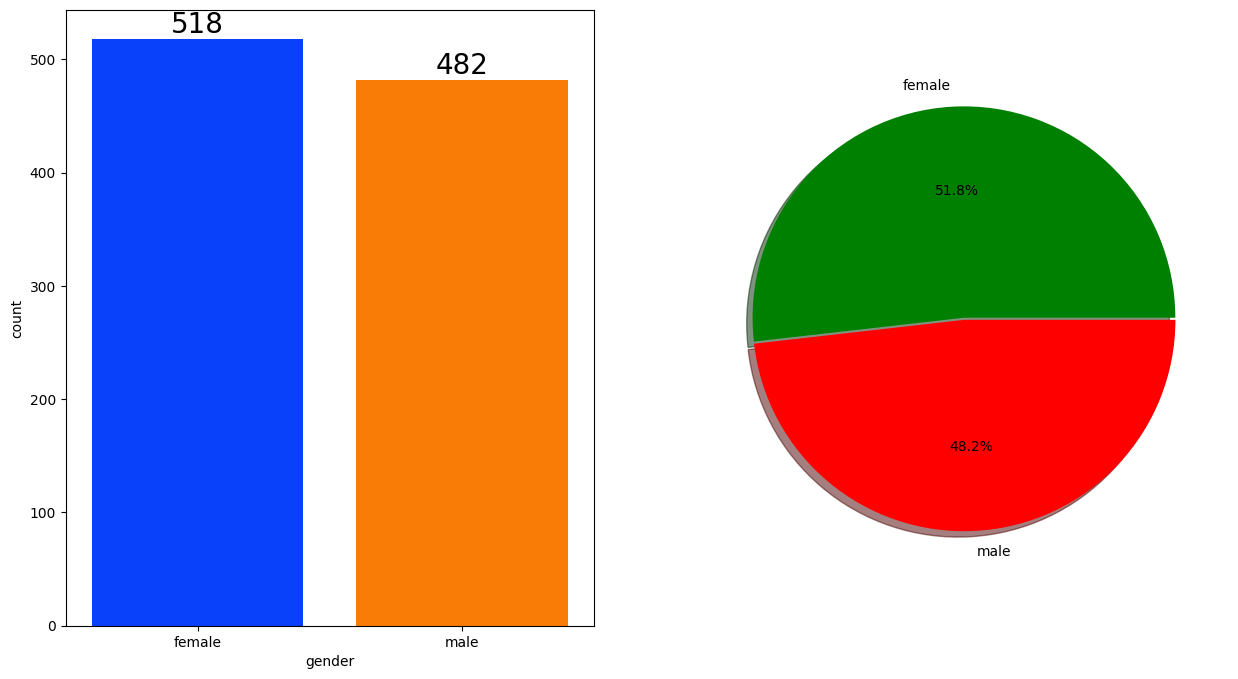

In [77]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
sns.countplot(ax=ax[0],x=df['gender'],data=df,palette='bright',saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)


ax[1].pie(x=df['gender'].value_counts(),labels=df['gender'].value_counts().index,explode=(0,0.01),shadow=True,autopct='%1.1f%%',colors=['g','r'])
plt.show()

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [78]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


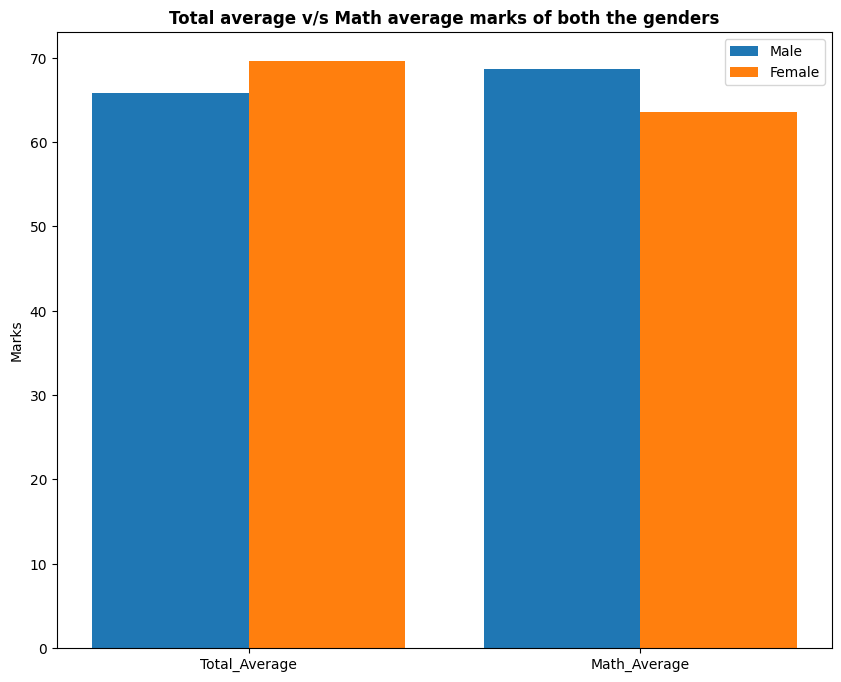

In [129]:
plt.figure(figsize=(10, 8))
X=['Total_Average','Math_Average']

female_scores=[gender_group['average_score'][0],gender_group['math_score'][0]]
male_scores=[gender_group['average_score'][1],gender_group['math_score'][1]]

X_axis=np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

### RACE_EHNICITY COLUMN

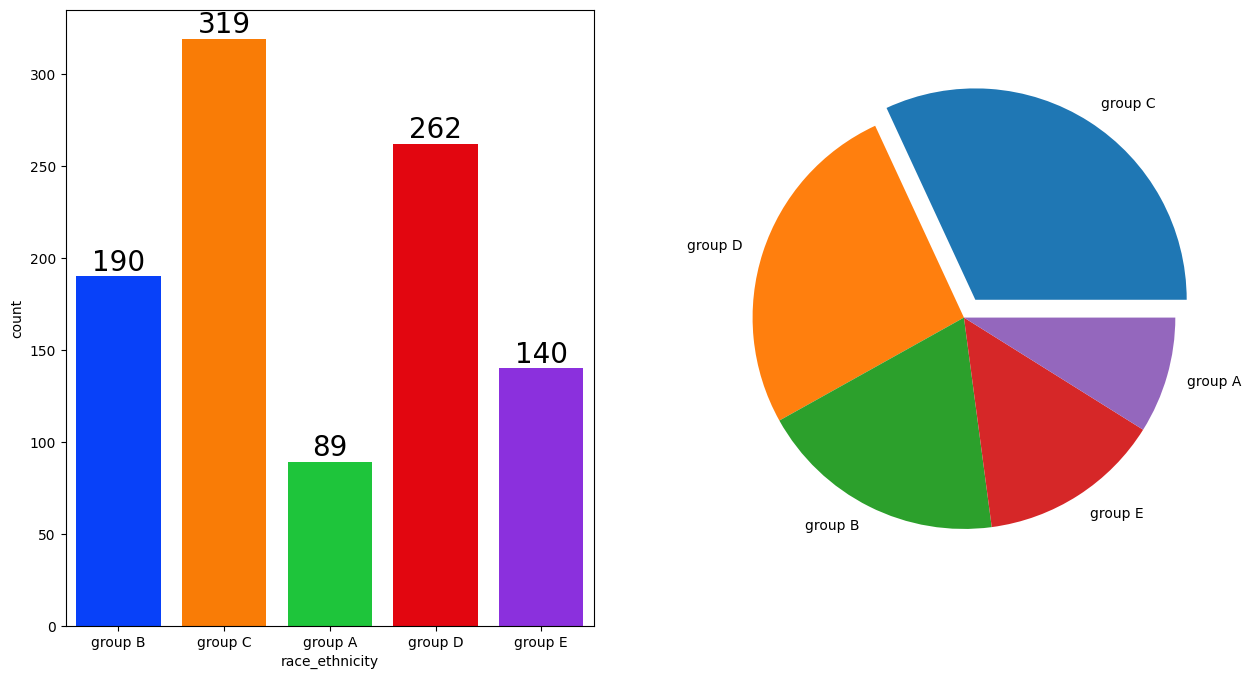

In [127]:
plt.close('all')
fig,ax=plt.subplots(1,2,figsize=(15,8))
sns.countplot(x=df['race_ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
ax[1].pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=(0.1,0,0,0,0))
plt.show()


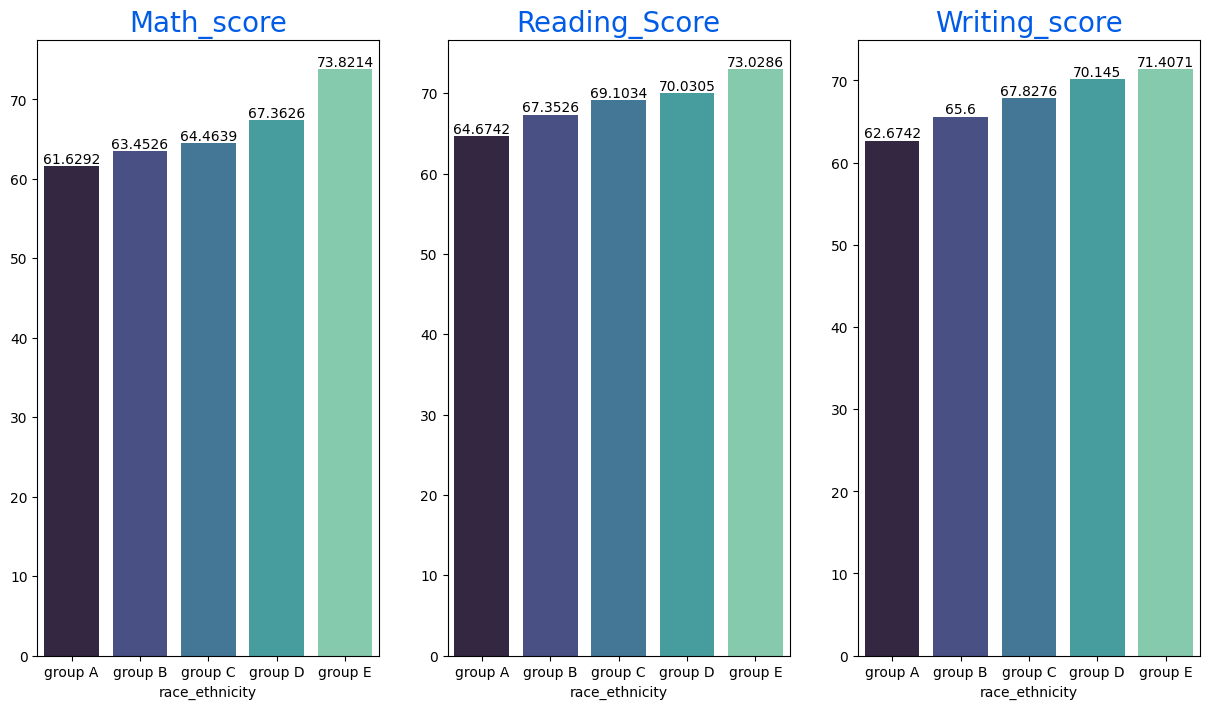

In [158]:
plt.close('all')
group_data=df.groupby('race_ethnicity')
group_data
f,ax=plt.subplots(1,3,figsize=(15,8))

sns.barplot(x=group_data['math_score'].mean().index,y=group_data['math_score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('Math_score',color='#005ce6',size=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)


sns.barplot(x=group_data['reading_score'].mean().index,y=group_data['reading_score'].mean().values,palette='mako',ax=ax[1])
ax[1].set_title('Reading_Score',color='#005ce6',size=20)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=10)

sns.barplot(x=group_data['writing_score'].mean().index,y=group_data['writing_score'].mean().values,palette='mako',ax=ax[2])
ax[2].set_title('Writing_score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=10)
plt.show()


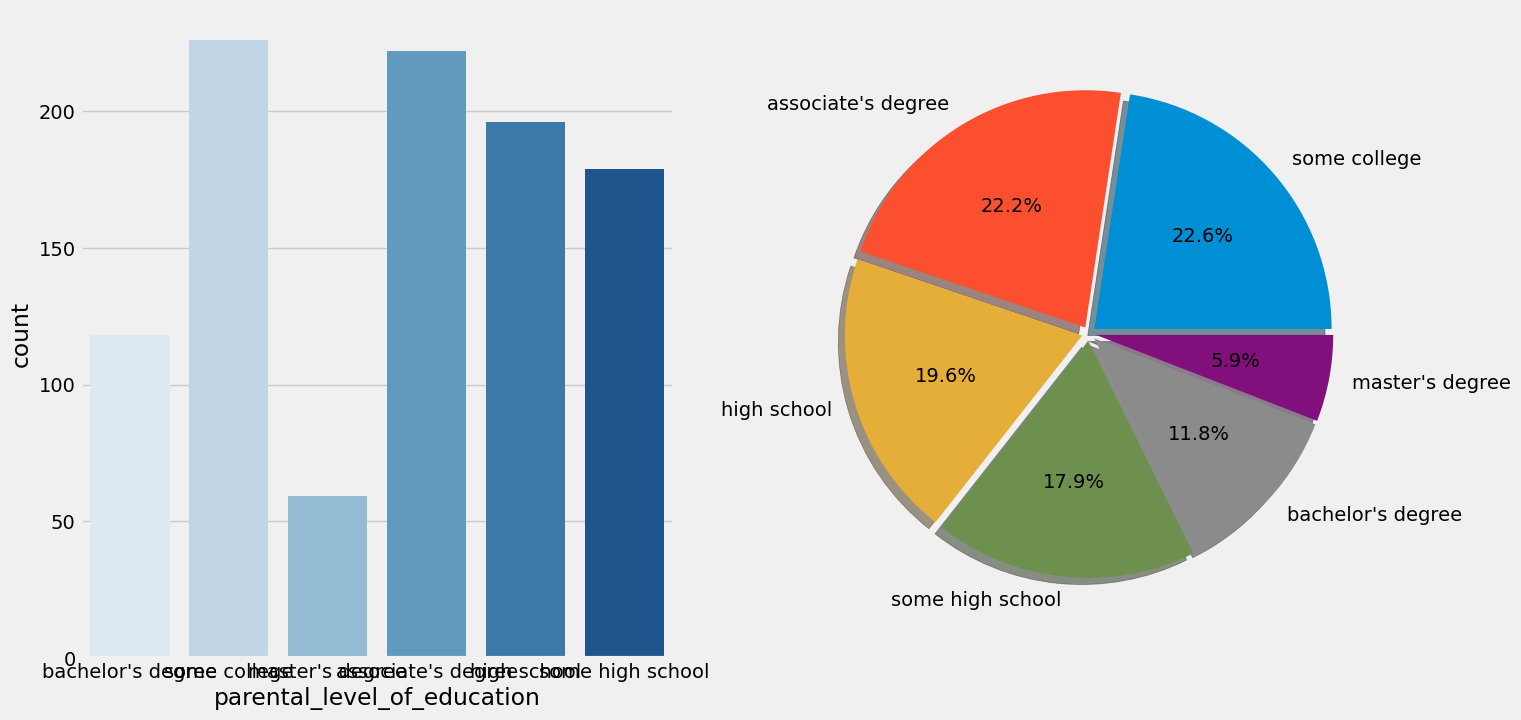

In [213]:
plt.close('all')
f,ax=plt.subplots(1,2,figsize=(15,8))

sns.countplot(x=df['parental_level_of_education'],data=df,ax=ax[0],palette='Blues')
explode=[0.03]*len(df['parental_level_of_education'].value_counts())
ax[1].pie(x=df['parental_level_of_education'].value_counts(),autopct='%1.1f%%',labels=df['parental_level_of_education'].value_counts().index,shadow=0.1,explode=explode)
plt.show()

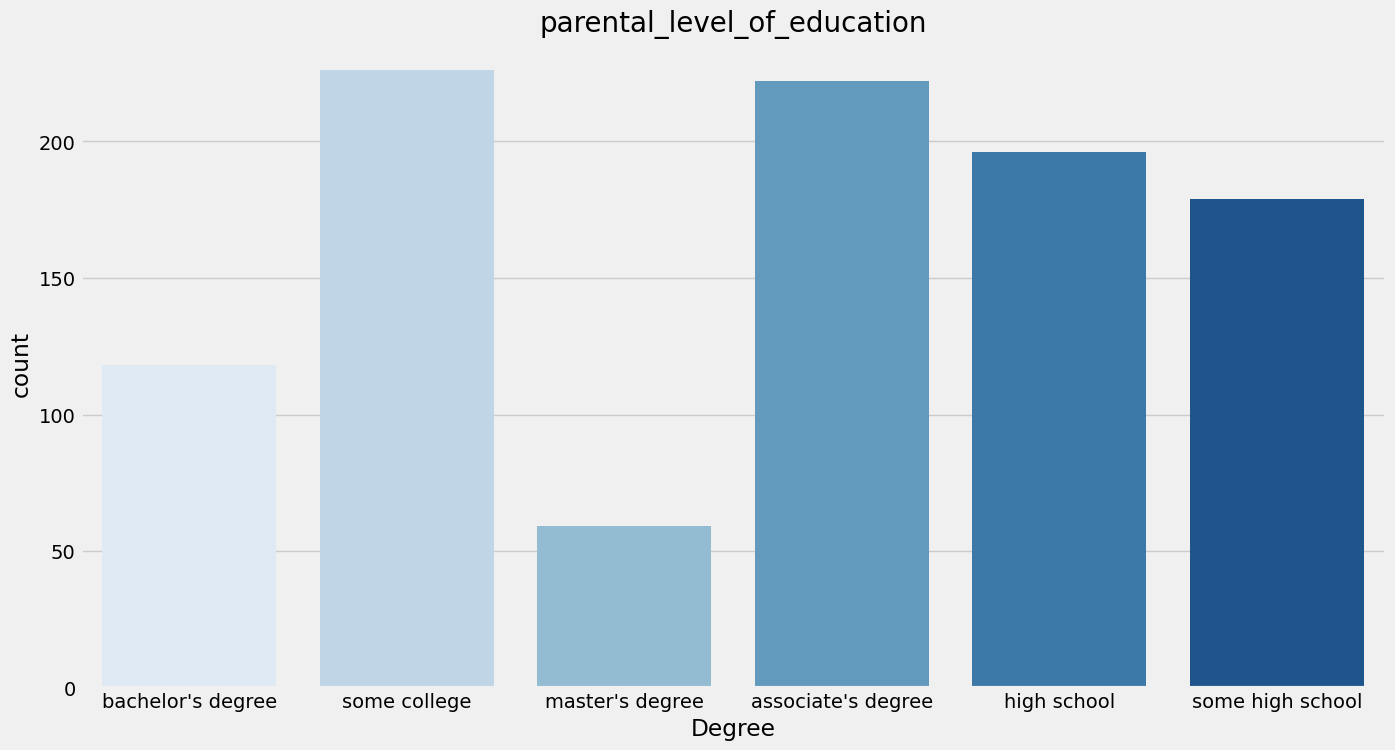

In [ ]:
plt.rcParams['figure.figsize']=(15,8)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental_level_of_education'],palette='Blues')
plt.title('parental_level_of_education',fontweight=30,fontsize=20)
plt.xlabel('Degree')
plt.show()

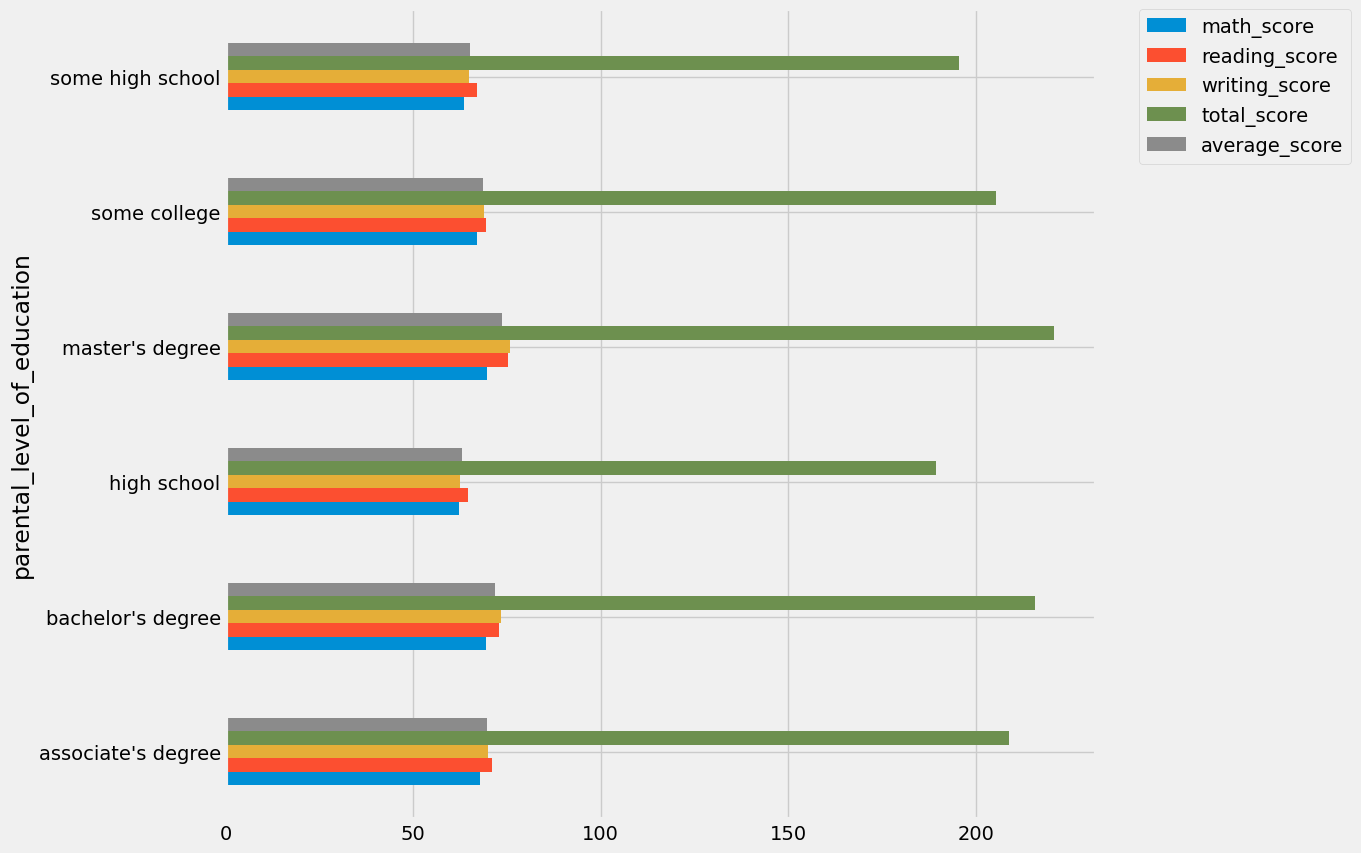

In [238]:
plt.close('all')
df.groupby('parental_level_of_education').agg('mean',numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0.)
plt.show()

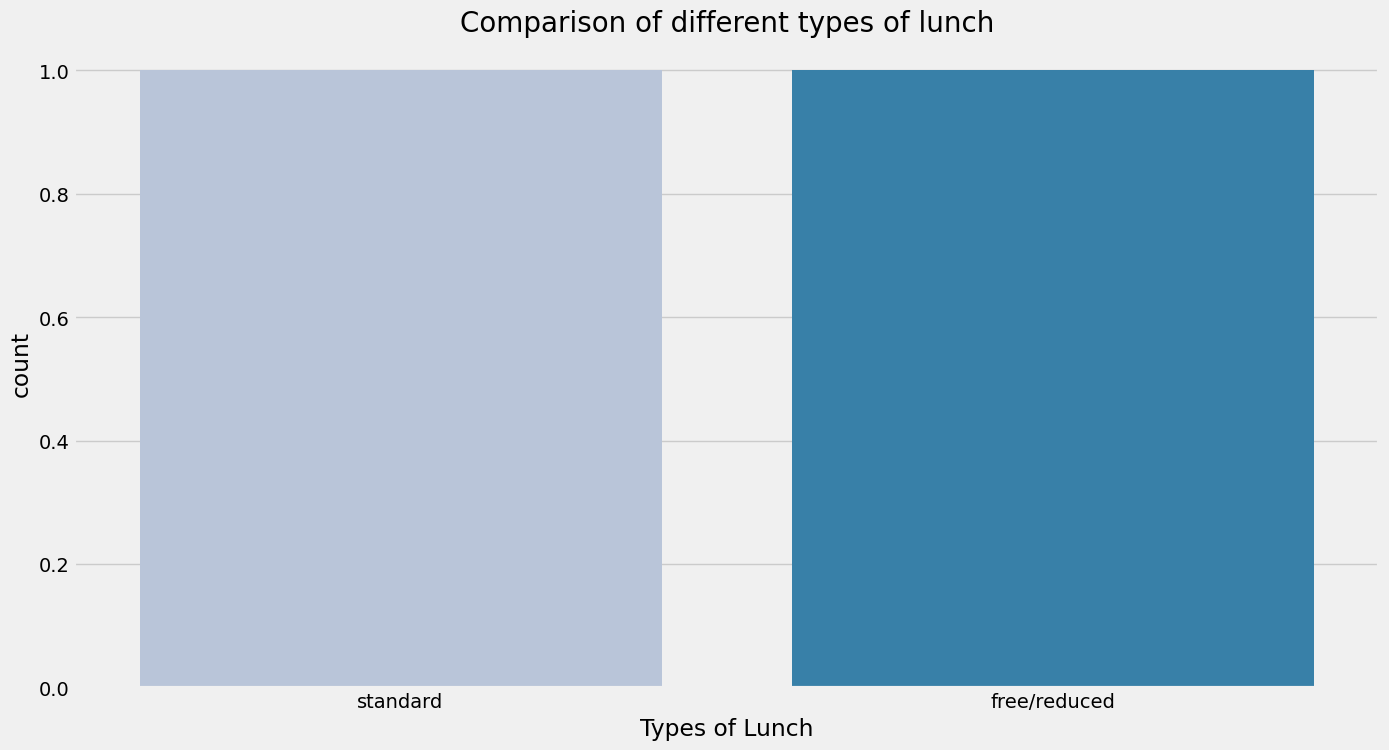

In [268]:
plt.close('all')
plt.rcParams['figure.figsize']=(15,8)
sns.countplot(x=df['lunch'].value_counts(),palette='PuBu')
plt.title('Comparison of different types of lunch',fontweight=30,fontsize=20)
plt.xticks(np.arange(len(df['lunch'].value_counts())),df['lunch'].value_counts().index)
plt.xlabel('Types of Lunch')
plt.show()



In [270]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


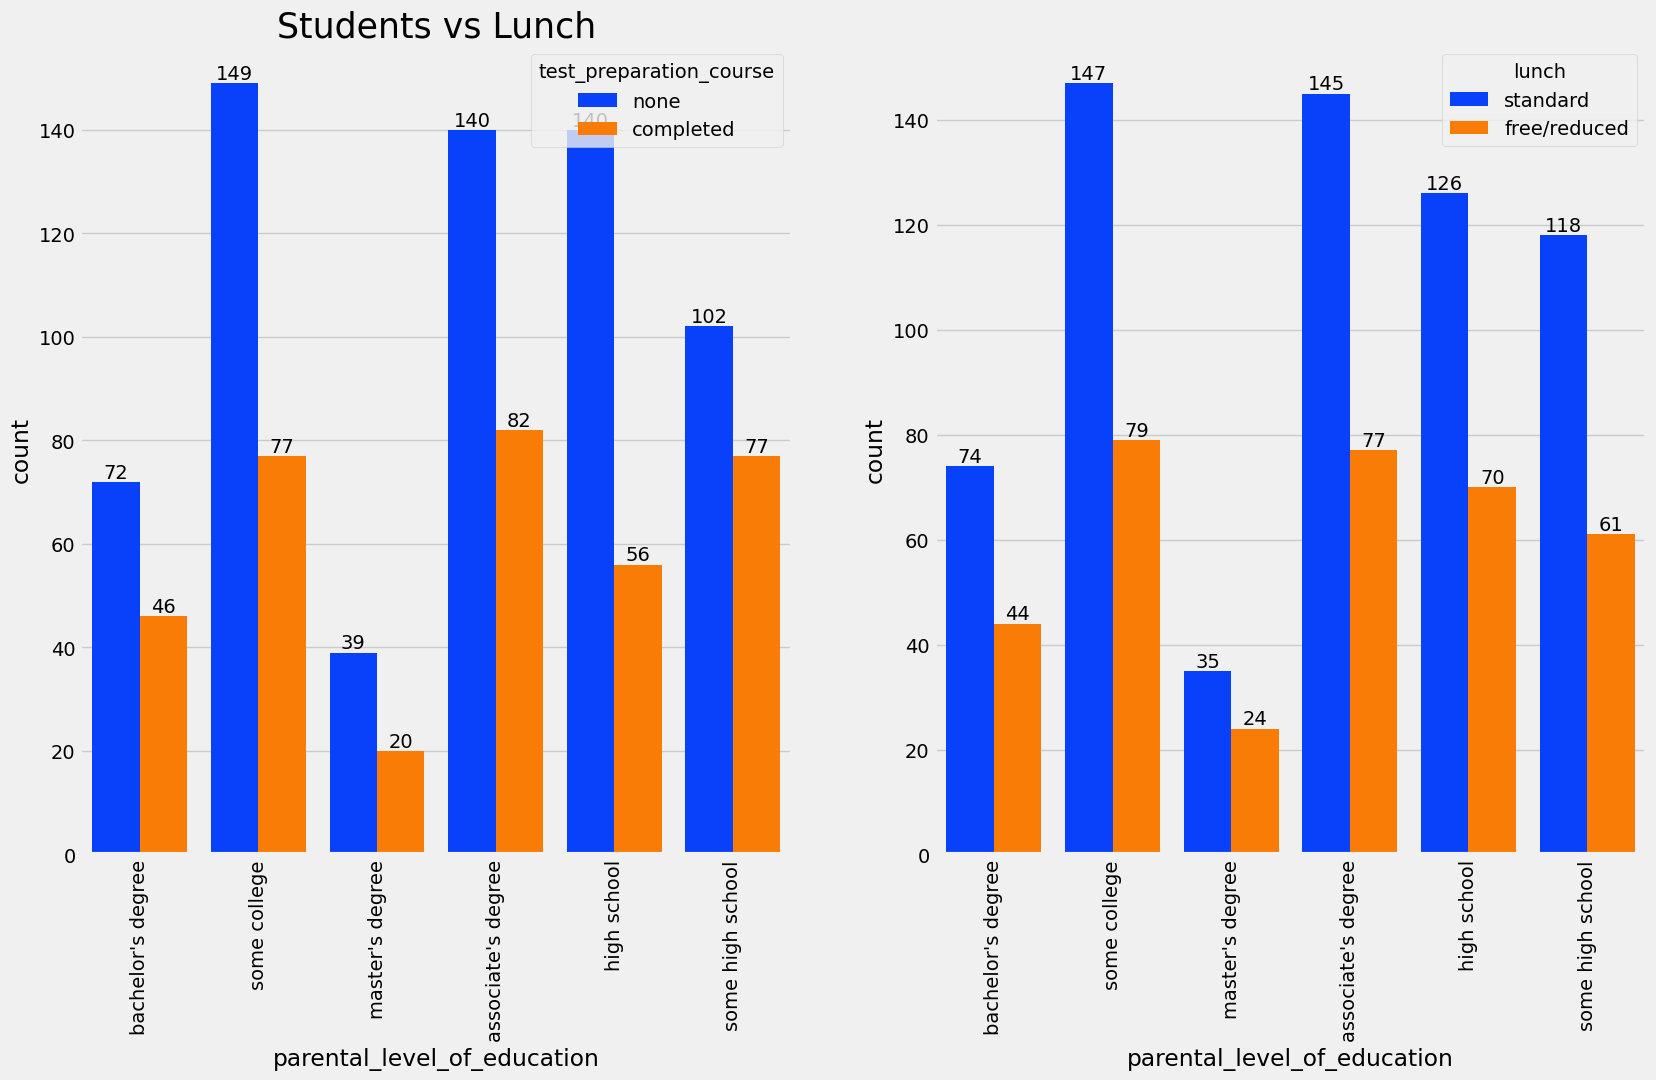

In [301]:
plt.close('all')
f,ax=plt.subplots(1,2,figsize=(18,10))


sns.countplot(x=df['parental_level_of_education'],data=df,palette='bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs Test preparation',color='black',size=25)
ax[0].tick_params(axis='x',rotation=90)

sns.countplot(x=df['parental_level_of_education'],data=df,hue='lunch',palette='bright',ax=ax[1],saturation=0.95)
ax[0].set_title('Students vs Lunch',color='black',size=25)
ax[1].tick_params(axis='x',rotation=90)

for i in range(2):
    for container in ax[i].containers:
        ax[i].bar_label(container) 

plt.show()

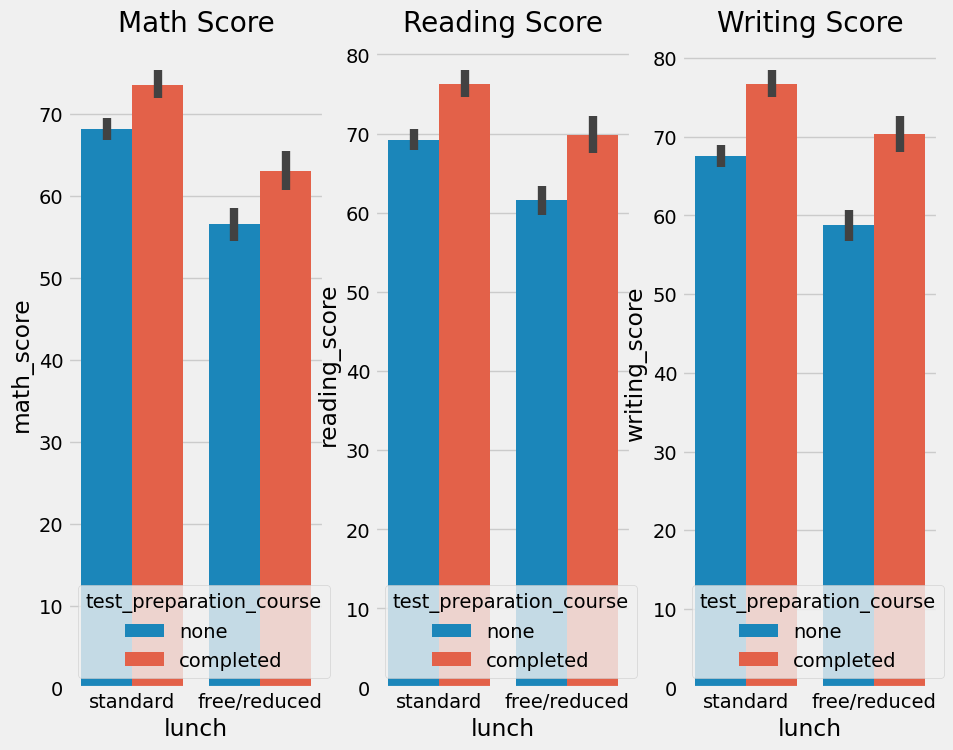

In [306]:
plt.close('all')

fig, ax = plt.subplots(1,3,figsize=(10,8))

sns.barplot(x='lunch', y='math_score', hue='test_preparation_course', data=df, ax=ax[0])
ax[0].set_title("Math Score")

sns.barplot(x='lunch', y='reading_score', hue='test_preparation_course', data=df, ax=ax[1])
ax[1].set_title("Reading Score")

sns.barplot(x='lunch', y='writing_score', hue='test_preparation_course', data=df, ax=ax[2])
ax[2].set_title("Writing Score")

plt.show()

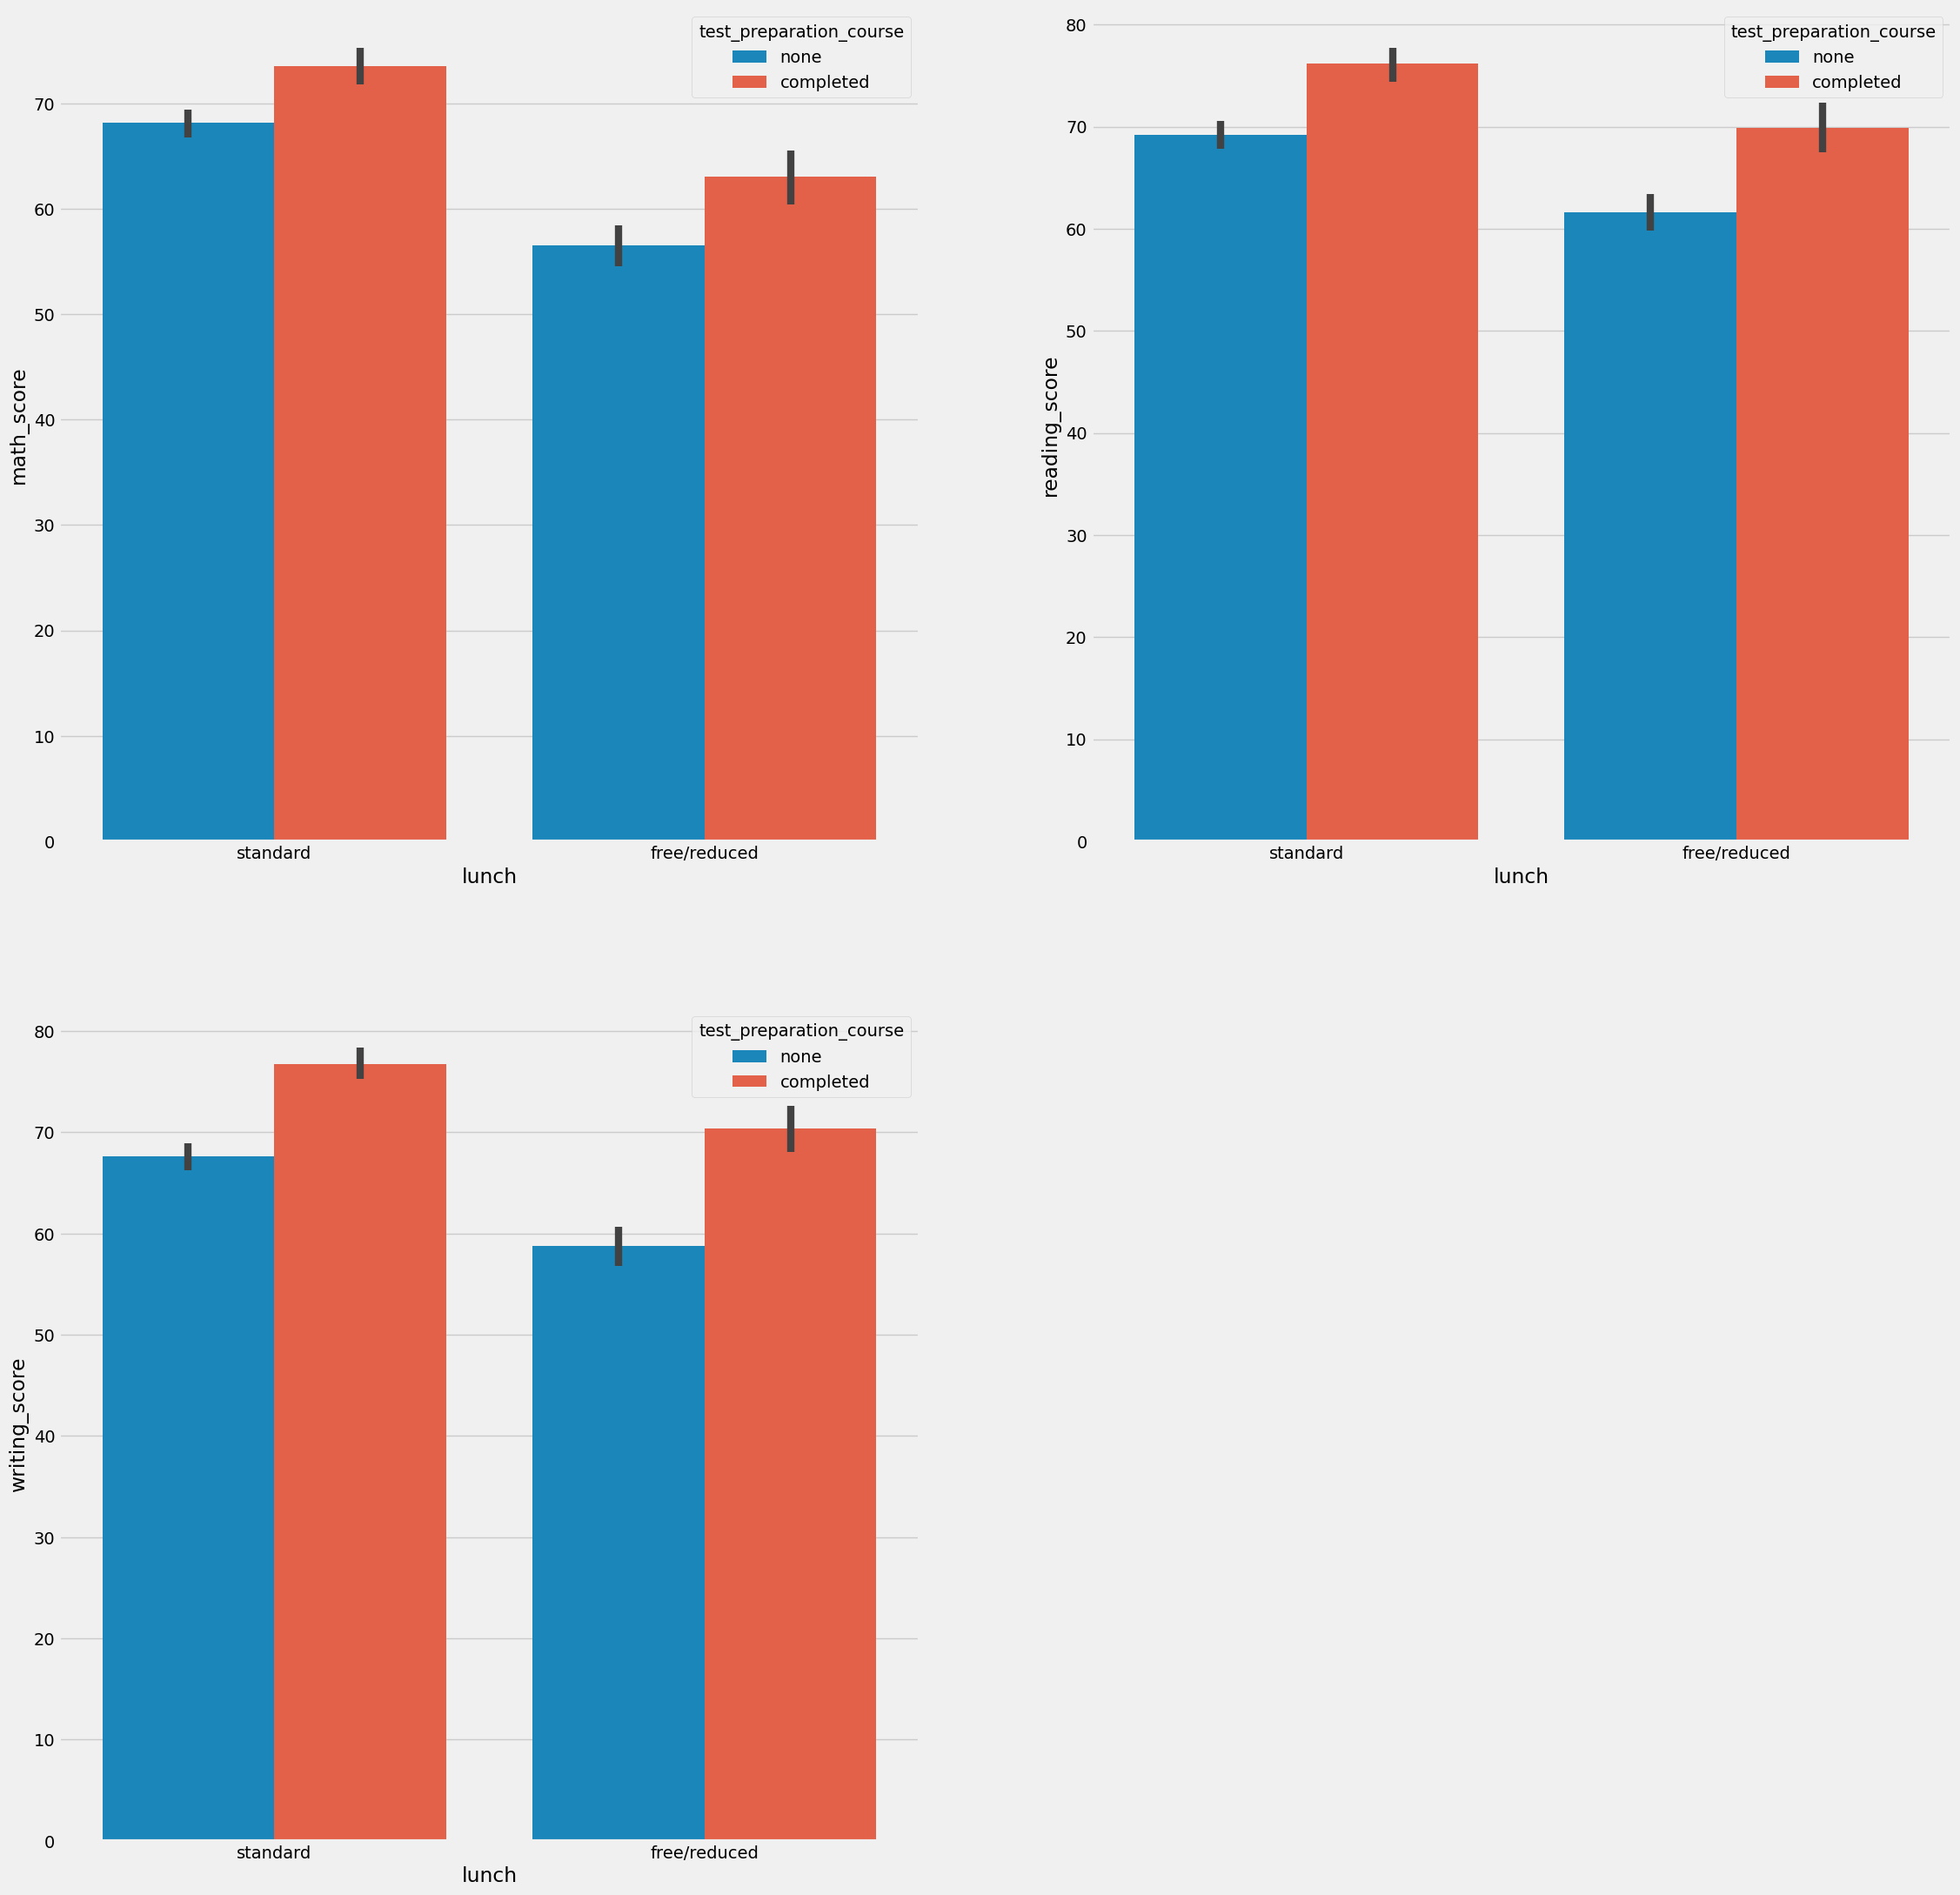

In [319]:
plt.figure(figsize=(25,26))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])
plt.show()

### Checking Outliers

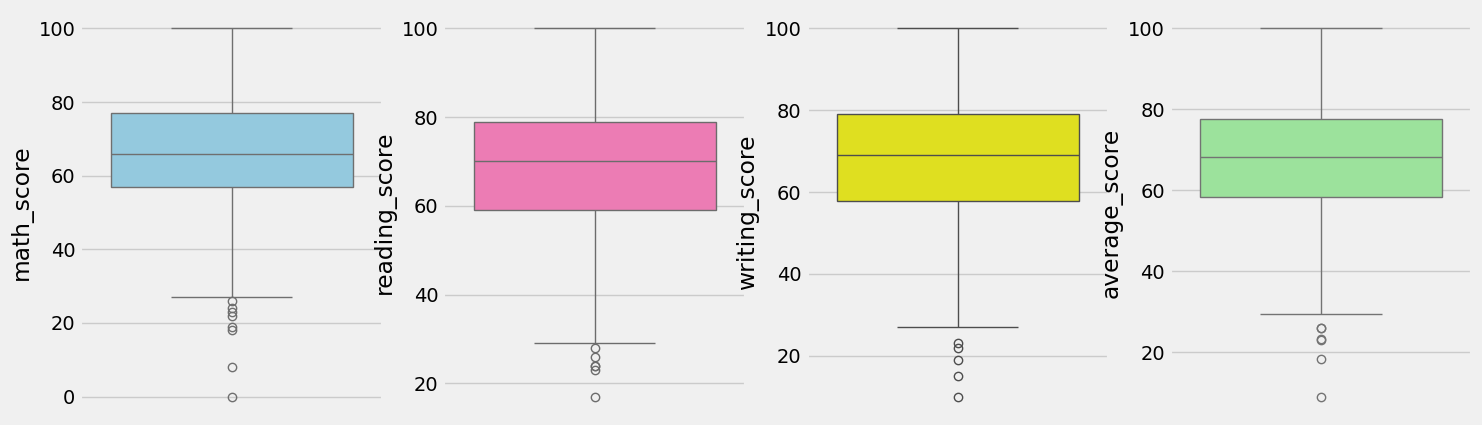

In [316]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

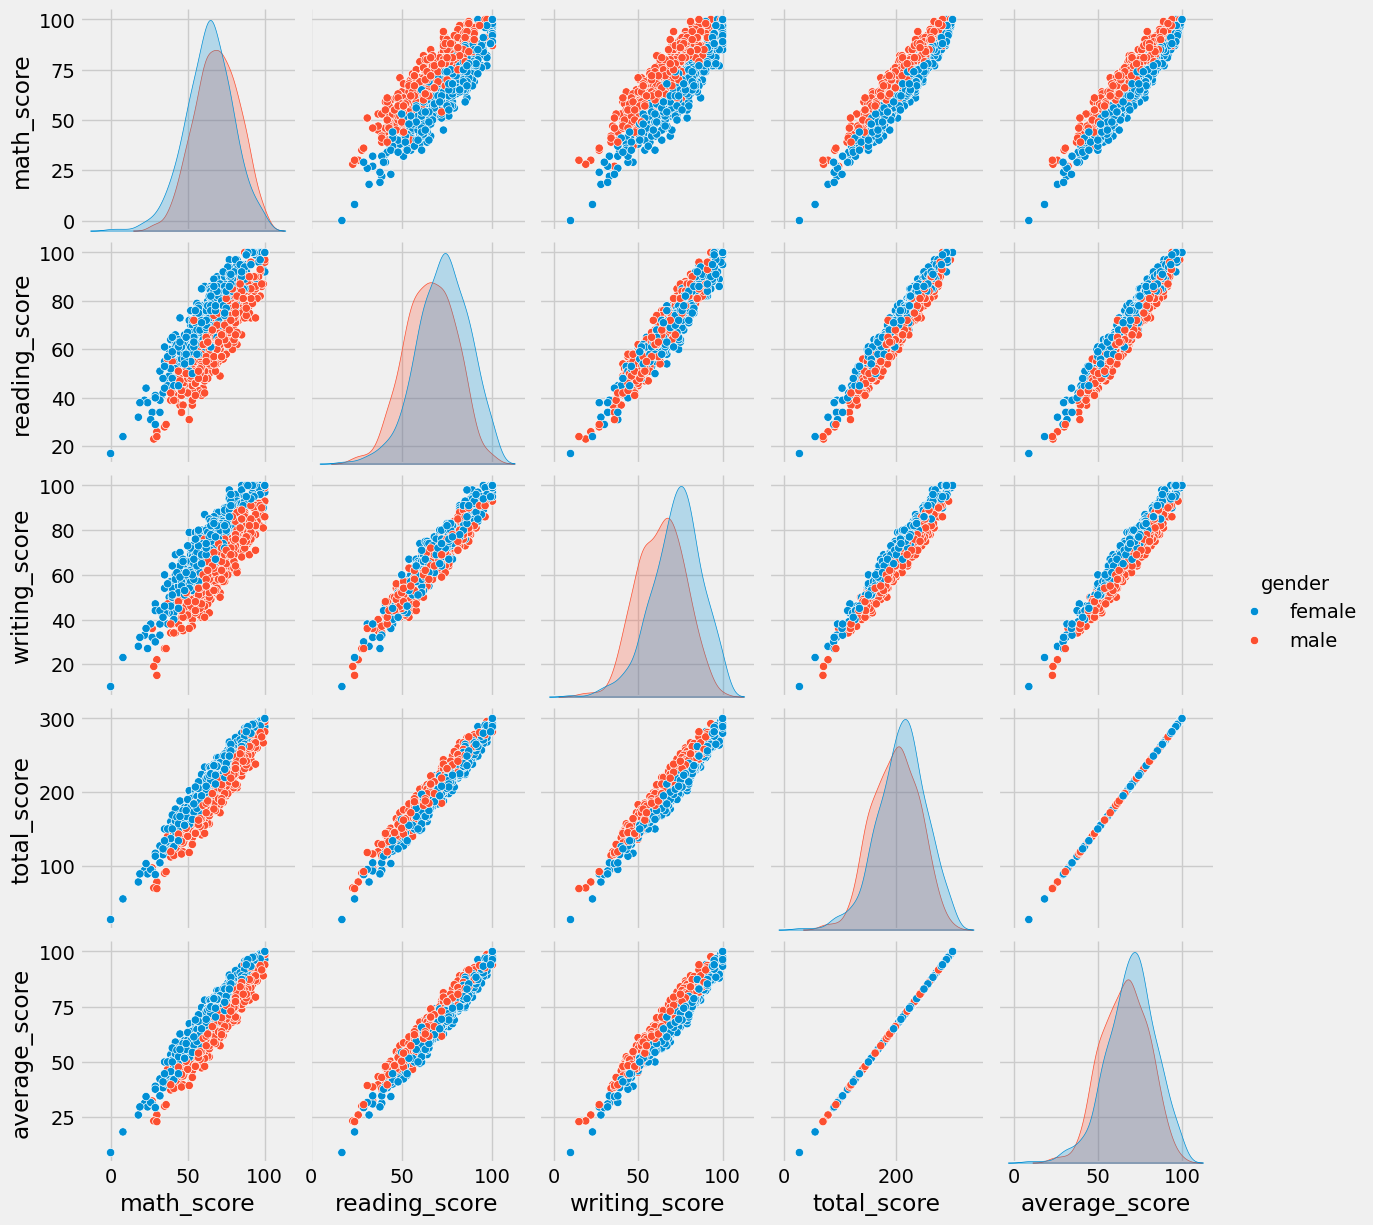

In [317]:
sns.pairplot(df,hue = 'gender')
plt.show()